<a href="https://colab.research.google.com/github/niharraju4/Sentimental-Analysis-for-Energy-and-power-Stocks-Predictions/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


RMSE:  2.0945091850882633


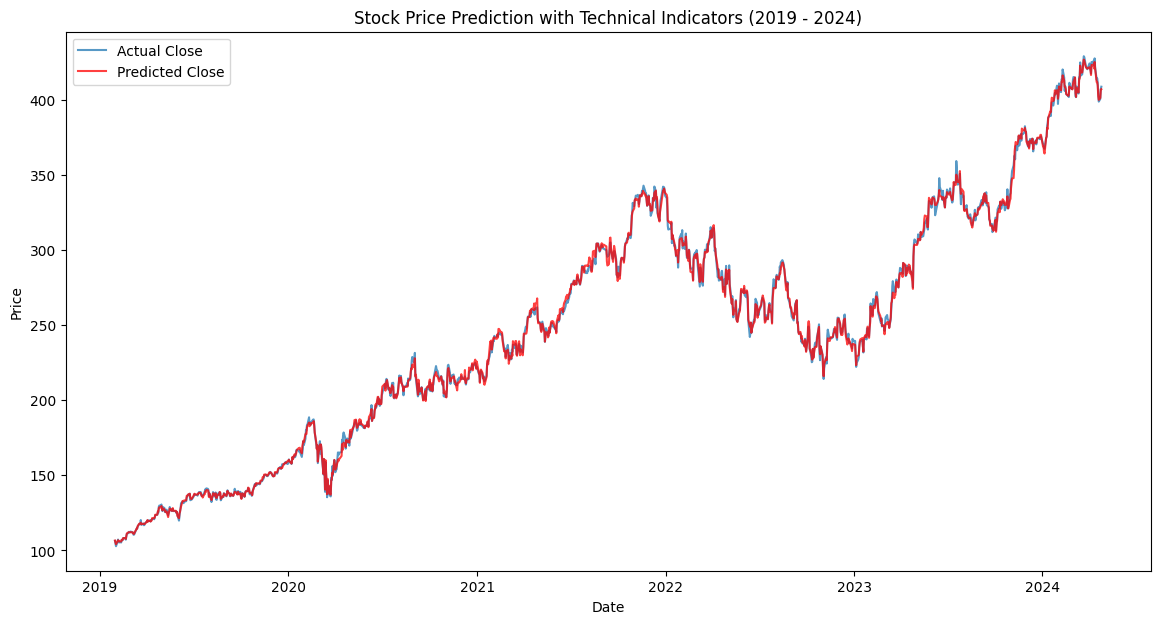

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fetch data
data = yf.download('MSFT', start="2019-01-01", end="2024-04-25")

# Calculate indicators
# Moving Averages
data['SMA'] = data['Close'].rolling(window=20).mean()
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()

# MACD
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
data['RSI'] = 100 - (100 / (1 + gain / loss))

# Bollinger Bands
data['Middle Band'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['Middle Band'] + 1.96 * data['Close'].rolling(window=20).std()
data['Lower Band'] = data['Middle Band'] - 1.96 * data['Close'].rolling(window=20).std()

# Stochastic Oscillator
data['Lowest_14'] = data['Low'].rolling(window=14).min()
data['Highest_14'] = data['High'].rolling(window=14).max()
data['Stochastic'] = 100 * (data['Close'] - data['Lowest_14']) / (data['Highest_14'] - data['Lowest_14'])

# Drop NaN
data = data.dropna()

# Features and Target
X = data[['SMA', 'EMA', 'MACD', 'Signal', 'RSI', 'Middle Band', 'Upper Band', 'Lower Band', 'Stochastic']]
y = data['Close']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log(y)  # Log transformation for normalization of prices

# No test set here; we'll predict the future directly
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_scaled, y_log)

# Predict future values
y_pred_log = model.predict(X_scaled)
y_pred = np.exp(y_pred_log)  # Convert back from log scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

# Plot
plt.figure(figsize=(14,7))
plt.plot(data.index, y, label='Actual Close', alpha=0.75)
plt.plot(data.index, y_pred, color='red', label='Predicted Close', alpha=0.75)
plt.title('Stock Price Prediction with Technical Indicators (2019 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fetch data
data = yf.download('MSFT', start="2019-01-01", end="2024-12-31")

# Calculate indicators
# Simple Moving Average
data['SMA'] = data['Close'].rolling(window=20).mean()
# Exponential Moving Average
data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
# Moving Average Convergence Divergence
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
# Relative Strength Index
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
data['RSI'] = 100 - (100 / (1 + gain / loss))
# Bollinger Bands
data['Middle Band'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['Middle Band'] + 1.96 * data['Close'].rolling(window=20).std()
data['Lower Band'] = data['Middle Band'] - 1.96 * data['Close'].rolling(window=20).std()
# Stochastic Oscillator
data['Lowest_14'] = data['Low'].rolling(window=14).min()
data['Highest_14'] = data['High'].rolling(window=14).max()
data['Stochastic'] = 100 * (data['Close'] - data['Lowest_14']) / (data['Highest_14'] - data['Lowest_14'])

# Drop NaN
data = data.dropna()

# Features and Target
X = data[['SMA', 'EMA', 'MACD', 'Signal', 'RSI', 'Middle Band', 'Upper Band', 'Lower Band', 'Stochastic']]
y = data['Close']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log(y)

# Model fitting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_scaled, y_log)

# Predict future values
y_pred_log = model.predict(X_scaled)
y_pred = np.exp(y_pred_log)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

# Plot with Plotly
fig = go.Figure()
# Actual Price Line
fig.add_trace(go.Scatter(x=data.index, y=y, mode='lines', name='Actual Close'))
# Predicted Price Line
fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Close', line=dict(dash='dash')))
fig.update_layout(title='Interactive Stock Price Prediction (2019 - 2024)',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  hovermode="x unified")
fig.show()


[*********************100%%**********************]  1 of 1 completed


RMSE:  2.0680280478697113


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots

# Define tickers
tickers = ['GOOGL', 'INTC', 'MSFT', 'AAPL', 'NVDA']
start_date = '2016-01-01'
end_date = '2024-04-25'

# Create a subplot figure
fig = make_subplots(rows=len(tickers), cols=1, shared_xaxes=True, subplot_titles=[ticker for ticker in tickers])

for i, ticker in enumerate(tickers, start=1):
    # Fetch data
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate indicators
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))

    # Drop NaNs
    data = data.dropna()

    # Features and Target
    X = data[['SMA', 'EMA', 'MACD', 'RSI']]
    y = data['Close']

    # Scaling
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    y_log = np.log(y)

    # Model fitting
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model.fit(X_scaled, y_log)
    y_pred_log = model.predict(X_scaled)
    y_pred = np.exp(y_pred_log)

    # Add traces to subplot
    fig.add_trace(go.Scatter(x=data.index, y=y, mode='lines', name=f'{ticker} Actual'), row=i, col=1)
    fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name=f'{ticker} Predicted', line=dict(dash='dash')), row=i, col=1)

# Update layout
fig.update_layout(height=1200, title_text='Stock Price Predictions for Multiple Stocks (2016 - 2024)', showlegend=False)
fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-25")
    # Technical Indicators
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std()
    data['Lower Band'] = data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()
    data['Volume EMA'] = data['Volume'].ewm(span=20, adjust=False).mean()
    # Additional indicators can include Percent Price Oscillator, Momentum, etc.
    # Drop rows with NaN values
    data = data.dropna()
    return data

# Function to train and predict using Random Forest and Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Volume EMA']]
    y_class = (data['Close'].shift(-1) > data['Close']).astype(int)  # Binary target for classification
    y_regress = data['Close']  # Target for regression

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train_class, y_test_class, y_train_regress, y_test_regress = train_test_split(
        X_scaled, y_class, y_regress, test_size=0.2, random_state=42)

    # Classification model
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train_class)
    y_pred_class = classifier.predict(X_scaled)

    # Regression model
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train_regress)
    y_pred_regress = regressor.predict(X_scaled)

    return y_pred_class, y_pred_regress, data.index

# Stocks to process
tickers = ['AAPL', 'GOOGL']
fig = go.Figure()

# Process each ticker
for ticker in tickers:
    data = prepare_data(ticker)
    y_pred_class, y_pred_regress, dates = train_and_predict(data)

    # Plot results
    fig.add_trace(go.Scatter(x=dates, y=data['Close'], mode='lines', name=f'{ticker} Actual Close'))
    fig.add_trace(go.Scatter(x=dates, y=y_pred_regress, mode='lines', name=f'{ticker} Predicted Close', line=dict(dash='dash')))

fig.update_layout(height=800, title_text='Stock Price Predictions and Classifications (2016 - 2024)', showlegend=True)
fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-25")
    # Basic Technical Indicators
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Close'].rolling(window=20).std()

    # Additional Indicators
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Close'] - data['Close'].rolling(window=20).mean()) / (0.015 * data['Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()) /
                         data['Close'].ewm(span=26, adjust=False).mean())

    data = data.dropna()
    return data

# Function to train and predict using Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Regression model
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_scaled)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return y_pred, rmse, data.index

# Process and plot data for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
figs = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, rmse, dates = train_and_predict(data)

    # Plot results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dates, y=data['Close'], mode='lines', name='Actual Close'))
    fig.add_trace(go.Scatter(x=dates, y=y_pred, mode='lines', name='Predicted Close', line=dict(dash='dash')))
    fig.update_layout(title=f'{ticker} Stock Predictions (2016 - 2024)\nRMSE: {rmse:.2f}', xaxis_title='Date', yaxis_title='Price')
    figs[ticker] = fig

# Show plots separately
figs['AAPL'].show()
figs['GOOGL'].show()

# Correlation and Covariance analysis
aapl_data = yf.download('AAPL', start="2016-01-01", end="2024-04-25")['Close']
googl_data = yf.download('GOOGL', start="2016-01-01", end="2024-04-25")['Close']
combined = pd.DataFrame({'AAPL': aapl_data, 'GOOGL': googl_data}).dropna()
print("Correlation between AAPL and GOOGL:", combined.corr())
print("Covariance between AAPL and GOOGL:", combined.cov())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Correlation between AAPL and GOOGL:            AAPL     GOOGL
AAPL   1.000000  0.956629
GOOGL  0.956629  1.000000
Covariance between AAPL and GOOGL:               AAPL        GOOGL
AAPL   3289.063258  1983.657877
GOOGL  1983.657877  1307.296288


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-25")
    # Basic Technical Indicators
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Close'] - data['Close'].rolling(window=20).mean()) / (0.015 * data['Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()) /
                         data['Close'].ewm(span=26, adjust=False).mean())

    data = data.dropna()
    return data

# Function to train and predict using Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Regression model
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_scaled)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return y_pred, rmse, data.index, y

# Process and plot data for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
results = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, rmse, dates, actuals = train_and_predict(data)

    # Create DataFrame for actual vs predicted
    results_df = pd.DataFrame({'Actual Close': actuals, 'Predicted Close': y_pred}, index=dates)
    results[ticker] = results_df

    # Plot results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dates, y=actuals, mode='lines+markers', name='Actual Close', hoverinfo='x+y'))
    fig.add_trace(go.Scatter(x=dates, y=y_pred, mode='lines+markers', name='Predicted Close', line=dict(dash='dash'), hoverinfo='x+y'))
    fig.update_layout(title=f'{ticker} Stock Predictions (2016 - 2024)\nRMSE: {rmse:.2f}', xaxis_title='Date', yaxis_title='Price', hovermode='x')
    fig.show()

    # Print DataFrame
    print(f"DataFrame for {ticker}:\n", results_df.head())

# Correlation and Covariance analysis
aapl_data = results['AAPL']['Actual Close']
googl_data = results['GOOGL']['Actual Close']
combined = pd.DataFrame({'AAPL': aapl_data, 'GOOGL': googl_data}).dropna()
print("Correlation between AAPL and GOOGL:", combined.corr())
print("Covariance between AAPL and GOOGL:", combined.cov())


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

DataFrame for AAPL:
             Actual Close  Predicted Close
Date                                     
2016-02-01     24.107500        24.351210
2016-02-02     23.620001        23.973966
2016-02-03     24.087500        24.254257
2016-02-04     24.150000        24.290428
2016-02-05     23.504999        23.627387


DataFrame for GOOGL:
             Actual Close  Predicted Close
Date                                     
2016-02-01     38.538502        38.069533
2016-02-02     39.045502        38.443939
2016-02-03     37.469002        37.580250
2016-02-04     36.501499        37.010205
2016-02-05     35.188000        35.949670
Correlation between AAPL and GOOGL:            AAPL     GOOGL
AAPL   1.000000  0.956028
GOOGL  0.956028  1.000000
Covariance between AAPL and GOOGL:               AAPL        GOOGL
AAPL   3274.491430  1973.065012
GOOGL  1973.065012  1300.760581


In [ ]:
results_df

Actual Close  Predicted Close
Date                                     
2016-02-01     38.538502        38.069533
2016-02-02     39.045502        38.443939
2016-02-03     37.469002        37.580250
2016-02-04     36.501499        37.010205
2016-02-05     35.188000        35.949670
...                  ...              ...
2024-04-18    156.009995       155.285211
2024-04-19    154.089996       153.710312
2024-04-22    156.279999       153.998632
2024-04-23    158.259995       157.400542
2024-04-24    159.130005       158.117901

[2072 rows x 2 columns]

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-25")
    data['SMA'] = data['Close'].rolling(window=20).mean()
    data['EMA'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Close'] - data['Close'].rolling(window=20).mean()) / (0.015 * data['Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()) /
                         data['Close'].ewm(span=26, adjust=False).mean())
    return data.dropna()

def train_and_predict(data, train_start, train_end, test_start, test_end):
    scaler = StandardScaler()
    data_filtered = data.loc[train_start:test_end]
    X = data_filtered[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data_filtered['Close']

    X_scaled = scaler.fit_transform(X)

    # Splitting data based on date
    train_mask = (data_filtered.index < train_end)
    test_mask = (data_filtered.index >= test_start) & (data_filtered.index <= test_end)

    X_train, y_train = X_scaled[train_mask], y[train_mask]
    X_test, y_test = X_scaled[test_mask], y[test_mask]

    # Train Gradient Boosting Regressor
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    return y_train, y_pred_train, y_test, y_pred_test, data_filtered.index[train_mask], data_filtered.index[test_mask]

# Prepare data and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
for ticker in tickers:
    data = prepare_data(ticker)
    y_train, y_pred_train, y_test, y_pred_test, train_dates, test_dates = train_and_predict(data, "2016-01-01", "2023-12-31", "2024-01-01", "2024-04-25")

    # Plot results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Actual Close (Train)'))
    fig.add_trace(go.Scatter(x=train_dates, y=y_pred_train, mode='lines', name='Predicted Close (Train)', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Actual Close (Test)'))
    fig.add_trace(go.Scatter(x=test_dates, y=y_pred_test, mode='lines', name='Predicted Close (Test)', line=dict(dash='dash')))
    fig.update_layout(title=f'{ticker} Stock Prediction (Train: 2016-2023, Test: 2024)', xaxis_title='Date', yaxis_title='Price')
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-25")
    # Use Adjusted Close
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Adj Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['Adj Close'].rolling(window=20).mean()) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    return data.dropna()

def train_and_predict(data, train_start, train_end, test_start, test_end):
    scaler = StandardScaler()
    data_filtered = data.loc[train_start:test_end]
    X = data_filtered[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data_filtered['Adj Close']

    X_scaled = scaler.fit_transform(X)

    # Splitting data based on date
    train_mask = (data_filtered.index < train_end)
    test_mask = (data_filtered.index >= test_start) & (data_filtered.index <= test_end)

    X_train, y_train = X_scaled[train_mask], y[train_mask]
    X_test, y_test = X_scaled[test_mask], y[test_mask]

    # Train Gradient Boosting Regressor
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    return y_train, y_pred_train, y_test, y_pred_test, data_filtered.index[train_mask], data_filtered.index[test_mask], rmse_train, rmse_test

# Prepare data and predict for AAPL and GOOGL
results_df = {}
tickers = ['AAPL', 'GOOGL']
for ticker in tickers:
    data = prepare_data(ticker)
    y_train, y_pred_train, y_test, y_pred_test, train_dates, test_dates, rmse_train, rmse_test = train_and_predict(data, "2016-01-01", "2023-12-31", "2024-01-01", "2024-04-25")

    # Create and print DataFrame for actual vs predicted
    train_df = pd.DataFrame({'Actual Close (Train)': y_train, 'Predicted Close (Train)': y_pred_train}, index=train_dates)
    test_df = pd.DataFrame({'Actual Close (Test)': y_test, 'Predicted Close (Test)': y_pred_test}, index=test_dates)
    results_df[ticker] = {'train': train_df, 'test': test_df}

    # Plot results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines+markers', name='Actual Close (Train)', hovertext=train_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=train_dates, y=y_pred_train, mode='lines+markers', name='Predicted Close (Train)', line=dict(dash='dash'), hovertext=train_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines+markers', name='Actual Close (Test)', hovertext=test_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=test_dates, y=y_pred_test, mode='lines+markers', name='Predicted Close (Test)', line=dict(dash='dash'), hovertext=test_dates.strftime('%Y-%m-%d')))
    fig.update_layout(title=f'{ticker} Stock Prediction (Train: 2016-2023, Test: 2024)\nRMSE Train: {rmse_train:.2f}, RMSE Test: {rmse_test:.2f}', xaxis_title='Date', yaxis_title='Price')
    fig.show()

    print(f"DataFrames for {ticker} (Train):\n", train_df.head())
    print(f"DataFrames for {ticker} (Test):\n", test_df.head())


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

DataFrames for AAPL (Train):
             Actual Close (Train)  Predicted Close (Train)
Date                                                     
2016-02-01             21.919331                21.764963
2016-02-02             21.476082                21.587524
2016-02-03             21.901144                21.764963
2016-02-04             22.077120                21.771200
2016-02-05             21.487488                21.588184
DataFrames for AAPL (Test):
             Actual Close (Test)  Predicted Close (Test)
Date                                                   
2024-01-02           185.403412              181.913811
2024-01-03           184.015198              181.241819
2024-01-04           181.678177              179.692516
2024-01-05           180.949097              178.702347
2024-01-08           185.323517              181.755068


DataFrames for GOOGL (Train):
             Actual Close (Train)  Predicted Close (Train)
Date                                                     
2016-02-01             38.538502                38.312692
2016-02-02             39.045502                38.401633
2016-02-03             37.469002                37.607007
2016-02-04             36.501499                36.996531
2016-02-05             35.188000                36.055872
DataFrames for GOOGL (Test):
             Actual Close (Test)  Predicted Close (Test)
Date                                                   
2024-01-02           138.169998              139.660630
2024-01-03           138.919998              139.660630
2024-01-04           136.389999              136.604685
2024-01-05           135.729996              136.688953
2024-01-08           138.839996              139.536091


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-04-26")
    # Use Adjusted Close
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Adj Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['Adj Close'].rolling(window=20).mean()) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    return data.dropna()

def train_and_predict(data, train_start, train_end, test_start, test_end):
    scaler = StandardScaler()
    data_filtered = data.loc[train_start:test_end]
    X = data_filtered[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data_filtered['Adj Close']

    X_scaled = scaler.fit_transform(X)

    # Splitting data based on date
    train_mask = (data_filtered.index < train_end)
    test_mask = (data_filtered.index >= test_start) & (data_filtered.index <= test_end)

    X_train, y_train = X_scaled[train_mask], y[train_mask]
    X_test, y_test = X_scaled[test_mask], y[test_mask]

    # Train Gradient Boosting Regressor
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

    return y_train, y_pred_train, y_test, y_pred_test, data_filtered.index[train_mask], data_filtered.index[test_mask], rmse_train, rmse_test

# Prepare data and predict for AAPL and GOOGL
results_df = {}
tickers = ['AAPL', 'GOOGL']
for ticker in tickers:
    data = prepare_data(ticker)
    y_train, y_pred_train, y_test, y_pred_test, train_dates, test_dates, rmse_train, rmse_test = train_and_predict(data, "2016-01-01", "2023-12-31", "2024-01-01", "2024-04-25")

    # Create and print DataFrame for actual vs predicted
    train_df = pd.DataFrame({'Actual Close (Train)': y_train, 'Predicted Close (Train)': y_pred_train}, index=train_dates)
    test_df = pd.DataFrame({'Actual Close (Test)': y_test, 'Predicted Close (Test)': y_pred_test}, index=test_dates)
    results_df[ticker] = {'train': train_df, 'test': test_df}

    # Plot results
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Actual Close (Train)', hovertext=train_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=train_dates, y=y_pred_train, mode='lines', name='Predicted Close (Train)', line=dict(dash='dash'), hovertext=train_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Actual Close (Test)', hovertext=test_dates.strftime('%Y-%m-%d')))
    fig.add_trace(go.Scatter(x=test_dates, y=y_pred_test, mode='lines', name='Predicted Close (Test)', line=dict(dash='dash'), hovertext=test_dates.strftime('%Y-%m-%d')))
    fig.update_layout(title=f'{ticker} Stock Prediction (Train: 2016-2023, Test: 2024)\nRMSE Train: {rmse_train:.2f}, RMSE Test: {rmse_test:.2f}', xaxis_title='Date', yaxis_title='Price')
    fig.show()

    print(f"DataFrames for {ticker} (Train):\n", train_df.head())
    print(f"DataFrames for {ticker} (Test):\n", test_df.head())

[*********************100%%**********************]  1 of 1 completed


DataFrames for AAPL (Train):
             Actual Close (Train)  Predicted Close (Train)
Date                                                     
2016-02-01             21.919333                21.764963
2016-02-02             21.476078                21.587524
2016-02-03             21.901144                21.764963
2016-02-04             22.077124                21.771200
2016-02-05             21.487484                21.588184
DataFrames for AAPL (Test):
             Actual Close (Test)  Predicted Close (Test)
Date                                                   
2024-01-02           185.403412              181.913811
2024-01-03           184.015198              181.241820
2024-01-04           181.678177              179.415713
2024-01-05           180.949097              178.425544
2024-01-08           185.323517              181.865229


[*********************100%%**********************]  1 of 1 completed


DataFrames for GOOGL (Train):
             Actual Close (Train)  Predicted Close (Train)
Date                                                     
2016-02-01             38.538502                38.312692
2016-02-02             39.045502                38.401633
2016-02-03             37.469002                37.607007
2016-02-04             36.501499                36.996531
2016-02-05             35.188000                36.055872
DataFrames for GOOGL (Test):
             Actual Close (Test)  Predicted Close (Test)
Date                                                   
2024-01-02           138.169998              139.660630
2024-01-03           138.919998              139.660630
2024-01-04           136.389999              136.604685
2024-01-05           135.729996              136.688953
2024-01-08           138.839996              139.536091


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime, timedelta
import plotly.graph_objs as go

def get_historical_data(ticker, end_date):
    start_date = "2016-01-01"
    data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    data = data.asfreq('B').ffill().bfill()  # Business days frequency, forward and backward fill
    return data

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def predict_future_prices(model, data, start_date, end_date, scaler):
    prediction_dates = pd.date_range(start=start_date, end=end_date, freq='B')
    predictions = []

    current_batch = data[-look_back:].reshape((1, look_back, 1))

    for _ in range(len(prediction_dates)):
        current_pred = model.predict(current_batch)[0]
        predictions.append(current_pred)
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

    # Inverse transform to get actual price predictions
    predictions = scaler.inverse_transform(predictions).flatten()

    return prediction_dates, predictions

# Hyperparameters
look_back = 60  # Number of previous days the model looks at to make a prediction

# Prepare data
ticker = 'AAPL'
end_training_date = "2024-04-26"
data = get_historical_data(ticker, end_training_date)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences for training
X = []
y = []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = create_lstm_model((X.shape[1], 1))

# Train the model
model.fit(X, y, epochs=5, batch_size=32)

# Predict from April 27, 2024 to May 30, 2024
start_prediction_date = "2024-04-27"
end_prediction_date = "2024-05-30"
prediction_dates, predictions = predict_future_prices(model, scaled_data, start_prediction_date, end_prediction_date, scaler)

# Plot the results
def plot_predictions(historical_data, prediction_dates, predictions, ticker):
    fig = go.Figure()

    # Add trace for historical data
    fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data, mode='lines', name='Historical Data'))

    # Add trace for predictions
    fig.add_trace(go.Scatter(x=prediction_dates, y=predictions, mode='lines+markers', name='Predicted', line=dict(color='red')))

    # Customize the layout
    fig.update_layout(
        title=f'{ticker} Stock Price Prediction',
        xaxis_title='Date',
        yaxis_title='Price',
        hovermode='x unified'
    )

    fig.show()

# Assuming 'data' is your historical data up to April 26, 2024, and is a pandas Series
# 'predictions' are the predicted values, and 'prediction_dates' are the corresponding future dates
plot_predictions(data, prediction_dates, predictions, ticker)

[*********************100%%**********************]  1 of 1 completed


Epoch 1/5
66/66 [==============================] - 9s 57ms/step - loss: 0.0217
Epoch 2/5
66/66 [==============================] - 5s 79ms/step - loss: 6.3155e-04
Epoch 3/5
66/66 [==============================] - 4s 59ms/step - loss: 6.2414e-04
Epoch 4/5
66/66 [==============================] - 4s 61ms/step - loss: 6.1619e-04
Epoch 5/5
1/1 [==============================] - 0s 26ms/step


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker, start_date, end_date, n_days_forward):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().clip(lower=0).rolling(window=14).mean() /
                          -data['Adj Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Perc Change'] = data['Adj Close'].pct_change()  # Calculate daily percentage change
    data['Future Price'] = data['Adj Close'].shift(-n_days_forward)  # Shift prices to predict future prices
    data['Future Perc Change'] = data['Perc Change'].shift(-n_days_forward)  # Shift percentage change for future prediction
    return data.dropna()

def train_and_predict(data):
    scaler = StandardScaler()
    features = ['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Perc Change']
    X = data[features]
    y = data['Future Perc Change']
    X_scaled = scaler.fit_transform(X)

    # Train Test Split
    split_index = int(len(X) * 0.8)
    X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Train Gradient Boosting Regressor
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    return y_test, y_pred, split_index

# Example Usage
ticker = 'AAPL'
start_date = '2016-01-01'
end_date = '2024-04-26'
n_days_forward = 7  # Predicting 7 days into the future

data = prepare_data(ticker, start_date, end_date, n_days_forward)
y_test, y_pred, split_index = train_and_predict(data)

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index[split_index:], y=y_test, mode='lines', name='Actual Future % Change'))
fig.add_trace(go.Scatter(x=data.index[split_index:], y=y_pred, mode='lines', name='Predicted Future % Change', line=dict(dash='dash')))
fig.update_layout(title=f'{ticker} Future Percentage Change Prediction', xaxis_title='Date', yaxis_title='Percentage Change', xaxis=dict(rangeslider=dict(visible=True), type="date"))
fig.show()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Load data
def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Feature Engineering
def feature_engineering(data):
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                  -data['Close'].diff().clip(upper=0).rolling(window=14).mean()))
    data['Volatility'] = data['Close'].rolling(window=20).std()
    data['Momentum'] = data['Close'] - data['Close'].shift(5)
    data['Percent Change'] = data['Close'].pct_change()
    return data.dropna()

# Prepare Training and Testing Sets
def prepare_data(data):
    features = ['SMA20', 'EMA20', 'MACD', 'RSI', 'Volatility', 'Momentum', 'Percent Change']
    X = data[features]
    y = data['Close'].shift(-1)  # Predict next day close
    y = y[:-1]  # Remove the last NaN value
    X = X[:-1]  # Align X by removing the last row to match y's shape
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    return X_train, X_test, y_train, y_test

# Train Model
def train_model(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train_scaled, y_train)
    return model, scaler

# Predict and Evaluate
def predict_evaluate(model, scaler, X_test, y_test):
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name='Predicted'))
    fig.update_layout(title='Stock Price Prediction', xaxis_title='Date', yaxis_title='Stock Price')
    fig.show()

# Main Function
def main():
    ticker = 'AAPL'
    start_date = '2012-01-01'
    end_date = '2024-05-05'
    data = load_data(ticker, start_date, end_date)
    data = feature_engineering(data)
    X_train, X_test, y_train, y_test = prepare_data(data)
    model, scaler = train_model(X_train, y_train)
    predict_evaluate(model, scaler, X_test, y_test)

if __name__ == '__main__':
    main()


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 623.3890254985614


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV

# Load data
def load_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)

# Feature Engineering
def feature_engineering(data):
    # Basic Moving Averages
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()

    # MACD
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()

    # RSI
    change = data['Adj Close'].diff(1)
    gain = change.where(change > 0, 0)
    loss = -change.where(change < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()

    # Williams %R
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))

    # CCI
    data['CCI'] = (data['Adj Close'] - data['Adj Close'].rolling(window=20).mean()) / (0.015 * data['Adj Close'].rolling(window=20).std())

    # Percentage Price Oscillator
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())

    # Percentage changes
    data['SMA % Change'] = data['SMA'].pct_change()
    data['EMA % Change'] = data['EMA'].pct_change()
    data['MACD % Change'] = data['MACD'].pct_change()
    data['RSI % Change'] = data['RSI'].pct_change()
    data['CCI % Change'] = data['CCI'].pct_change()
    data['PPO % Change'] = data['PPO'].pct_change()

    return data.dropna()

# Prepare data
def prepare_data(data):
    features = data.columns.drop('Adj Close')
    X = data[features]
    y = data['Adj Close'].shift(-1)  # Predict next day close
    # Ensuring X and y have the same length after shifting y
    X = X.iloc[:-1]  # Drop the last row to prevent misalignment with y
    y = y.dropna()  # Drop NaN in y to ensure consistent length
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    return X_train, X_test, y_train, y_test

# Update the train_model function to include hyperparameter tuning
def train_model(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Define a set of parameters to test
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }

    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)
    return best_model, scaler

# Predict and evaluate
def predict_evaluate(model, scaler, X_test, y_test):
    X_test_scaled = scaler.transform(X_test)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    return predictions, mse

# Plotting
def plot_results(y_test, predictions):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name='Predicted'))
    fig.update_layout(title='Stock Price Prediction', xaxis_title='Date', yaxis_title='Price')
    fig.show()

# Modify the main function to incorporate the changes
def main():
    ticker = 'AAPL'
    start_date = '2012-01-01'
    end_date = '2024-05-05'
    data = load_data(ticker, start_date, end_date)
    data = feature_engineering(data)
    X_train, X_test, y_train, y_test = prepare_data(data)
    model, scaler = train_model(X_train, y_train)
    predictions, mse = predict_evaluate(model, scaler, X_test, y_test)
    print(f"Mean Squared Error: {mse}")
    plot_results(y_test, predictions)

if __name__ == '__main__':
    main()

[*********************100%%**********************]  1 of 1 completed


Best parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 470.2554866412884


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end="2024-05-06")
    # Basic Technical Indicators
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    change = data['Adj Close'].diff()
    gain = (change.where(change > 0, 0).rolling(window=14).mean())
    loss = (-change.where(change < 0, 0).rolling(window=14).mean())
    data['RSI'] = 100 - (100 / (1 + gain / loss))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())

    data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
    data.dropna(inplace=True)  # Drop rows with NaN values
    return data

# Function to train and predict using Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)

    # Prepare future data
    future_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=7)
    last_row = data.iloc[-1][['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    future_data = pd.DataFrame([last_row.values] * 7, columns=X.columns, index=future_index)
    X_future = scaler.transform(future_data)  # Scale the future data
    y_future = regressor.predict(X_future)  # Predict future prices

    return y_future, future_index, data

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_future, future_dates, data = train_and_predict(data)
    predictions[ticker] = (y_future, future_dates, data)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Close', line=dict(dash='dash')))
    fig.update_layout(title=f"{ticker} Stock Price Prediction",
                      xaxis_title='Date',
                      yaxis_title='Price (USD)',
                      legend_title="Legend")
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    # Basic Technical Indicators
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    change = data['Adj Close'].diff()
    gain = (change.where(change > 0, 0).rolling(window=14).mean())
    loss = (-change.where(change < 0, 0).rolling(window=14).mean())
    data['RSI'] = 100 - (100 / (1 + gain / loss))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())

    data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
    data.dropna(inplace=True)  # Drop rows with NaN values
    return data

# Function to train and predict using Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)

    # Prepare future data from today
    future_index = pd.date_range(start=datetime.now().strftime('%Y-%m-%d'), periods=7)
    last_row = data.iloc[-1][['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    future_data = pd.DataFrame([last_row.values] * 7, columns=X.columns, index=future_index)
    X_future = scaler.transform(future_data)  # Scale the future data
    y_future = regressor.predict(X_future)  # Predict future prices

    return y_future, future_index, data

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_future, future_dates, data = train_and_predict(data)
    predictions[ticker] = (y_future, future_dates, data)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Close', line=dict(dash='dash')))
    fig.update_layout(title=f"{ticker} Stock Price Prediction",
                      xaxis_title='Date',
                      yaxis_title='Price (USD)',
                      legend_title="Legend",
                      xaxis=dict(
                          tickformat='%Y-%m-%d',
                          tickmode='auto',
                          nticks=20
                      ))
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#1
#1
#1
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

# Function to download data and calculate indicators
def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    # Basic Technical Indicators
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    change = data['Adj Close'].diff()
    gain = (change.where(change > 0, 0).rolling(window=14).mean())
    loss = (-change.where(change < 0, 0).rolling(window=14).mean())
    data['RSI'] = 100 - (100 / (1 + gain / loss))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())

    data.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
    data.dropna(inplace=True)  # Drop rows with NaN values
    return data

# Function to train and predict using Gradient Boosting
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)

    # Predict on historical data
    y_pred = regressor.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Prepare future data from today
    future_index = pd.date_range(start=datetime.now().strftime('%Y-%m-%d'), periods=7)
    last_row = data.iloc[-1][['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    future_data = pd.DataFrame([last_row.values] * 7, columns=X.columns, index=future_index)
    X_future = scaler.transform(future_data)  # Scale the future data
    y_future = regressor.predict(X_future)  # Predict future prices

    return y_pred, y_future, future_index, data, rmse

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, y_future, future_dates, data, rmse = train_and_predict(data)
    predictions[ticker] = (y_pred, y_future, future_dates, data, rmse)

# Plotting
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
fig.update_layout(
    title=f"{ticker} Stock Price Prediction with RMSE: {rmse:.2f}",
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    legend_title="Legend",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date",
        tickformat='%Y-%m-%d',
        tickmode='auto',
        nticks=20
    )
)

fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#2
#2
#2


import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    change = data['Adj Close'].diff()
    gain = change.where(change > 0, 0).rolling(window=14).mean()
    loss = -change.where(change < 0, 0).rolling(window=14).mean()
    data['RSI'] = 100 - (100 / (1 + gain / loss))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    # Adding a simple lag feature
    data['Lag_Close'] = data['Adj Close'].shift(1)

    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data

def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    future_index = pd.date_range(start=datetime.now(), periods=7)
    future_data = pd.DataFrame(index=future_index, columns=X.columns)
    for column in X.columns:
        last_value = data.iloc[-1][column]
        scale = 0.05 * abs(last_value)  # Using absolute value to ensure scale is always positive
        future_data[column] = np.random.normal(loc=last_value, scale=scale, size=len(future_index))

    X_future = scaler.transform(future_data)
    y_future = regressor.predict(X_future)

    return y_pred, y_future, future_index, data, rmse

def train_and_optimize(data):
    X = data.drop(['Adj Close'], axis=1)
    y = data['Adj Close']

    # Setting up parameter grid
    param_grid = {
        'n_estimators': [100, 200],  # More estimators can be tested
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5],
        'subsample': [0.9, 1.0]  # Subsampling less than 1.0 can lead to a reduction of variance
    }

    regressor = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    return best_model

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL', 'MSFT', 'INTC', 'NVDA']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, y_future, future_dates, data, rmse = train_and_predict(data)
    predictions[ticker] = (y_pred, y_future, future_dates, data, rmse)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
    fig.update_layout(
        title=f"{ticker} Stock Price Prediction with RMSE: {rmse:.2f}",
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        legend_title="Legend",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date",
            tickformat='%Y-%m-%d',
            tickmode='auto',
            nticks=20
        )
    )
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#3
#3
#3


import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    change = data['Adj Close'].diff()
    gain = change.where(change > 0, 0).rolling(window=14).mean()
    loss = -change.where(change < 0, 0).rolling(window=14).mean()
    data['RSI'] = 100 - (100 / (1 + gain / loss))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    # Adding a lag feature
    data['Lag Close'] = data['Adj Close'].shift(1)

    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data

def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO', 'Lag Close']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Hyperparameter Tuning Setup
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5],
        'subsample': [0.9, 1.0]
    }
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled, y)
    best_model = grid_search.best_estimator_

    # Predict on historical data
    y_pred = best_model.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Prepare future data
    future_index = pd.date_range(start=datetime.now(), periods=7)
    future_data = pd.DataFrame(index=future_index, columns=X.columns)
    for column in X.columns:
        last_value = data.iloc[-1][column]
        scale = 0.05 * abs(last_value)
        future_data[column] = np.random.normal(loc=last_value, scale=scale, size=len(future_index))

    X_future = scaler.transform(future_data)
    y_future = best_model.predict(X_future)

    return y_pred, y_future, future_index, data, rmse

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL', 'MSFT', 'INTC']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, y_future, future_dates, data, rmse = train_and_predict(data)
    predictions[ticker] = (y_pred, y_future, future_dates, data, rmse)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
    fig.update_layout(
        title=f"{ticker} Stock Price Prediction with RMSE: {rmse:.2f}",
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        legend_title="Legend",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date",
            tickformat='%Y-%m-%d',
            tickmode='auto',
            nticks=20
        )
    )
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#4
#4
#4

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().where(lambda x: x > 0, 0).rolling(window=14).mean() /
                                  -data['Adj Close'].diff().where(lambda x: x < 0, 0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    data['Lag Close'] = data['Adj Close'].shift(1)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data
def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO', 'Lag Close']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize list for storing fitted models
    fitted_models = []

    models = [
        ('GBR', GradientBoostingRegressor(random_state=42), {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5],
            'subsample': [0.9, 1.0]
        }),
        ('RFR', RandomForestRegressor(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [3, 5]
        }),
        ('ABR', AdaBoostRegressor(random_state=42), {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1]
        }),
        ('SVR', SVR(), {
            'C': [1, 10],
            'gamma': ['scale', 'auto']
        })
    ]

    predictions = []
    for name, model, params in models:
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_scaled, y)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_scaled)
        model_rmse = np.sqrt(mean_squared_error(y, y_pred))
        predictions.append(y_pred)
        fitted_models.append(best_model)  # Store the best model from grid search
        print(f"{name} RMSE: {model_rmse:.2f}")
        print(f"{name} best parameters: {grid_search.best_params_}")

    # Averaging Ensemble
    ensemble_predictions = np.mean(predictions, axis=0)
    ensemble_rmse = np.sqrt(mean_squared_error(y, ensemble_predictions))
    print(f"Ensemble RMSE: {ensemble_rmse:.2f}")

    # Predict on future data
    future_index = pd.date_range(start=datetime.now(), periods=7)
    future_data = pd.DataFrame(index=future_index, columns=X.columns)
    for column in X.columns:
        last_value = data.iloc[-1][column]
        scale = 0.05 * abs(last_value)
        future_data[column] = np.random.normal(loc=last_value, scale=scale, size=len(future_index))

    X_future_scaled = scaler.transform(future_data)
    ensemble_future_predictions = np.mean([model.predict(X_future_scaled) for model in fitted_models], axis=0)

    return ensemble_predictions, ensemble_future_predictions, future_index, data, ensemble_rmse



# Process and predict for selected tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'INTC']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    ensemble_predictions, ensemble_future_predictions, future_dates, data, ensemble_rmse = train_and_predict(data)
    predictions[ticker] = (ensemble_predictions, ensemble_future_predictions, future_dates, data, ensemble_rmse)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=data.index, y=ensemble_predictions, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=future_dates, y=ensemble_future_predictions, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
    fig.update_layout(
        title=f"{ticker} Stock Price Prediction with Ensemble RMSE: {ensemble_rmse:.2f}",
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        legend_title="Legend",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date",
            tickformat='%Y-%m-%d',
            tickmode='auto',
            nticks=20
        )
    )
    fig.show()


[*********************100%%**********************]  1 of 1 completed


GBR RMSE: 0.33
GBR best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
RFR RMSE: 1.87
RFR best parameters: {'max_depth': 5, 'n_estimators': 200}
ABR RMSE: 4.48
ABR best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
SVR RMSE: 1.15
SVR best parameters: {'C': 10, 'gamma': 'auto'}
Ensemble RMSE: 1.54


[*********************100%%**********************]  1 of 1 completed


GBR RMSE: 0.91
GBR best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
RFR RMSE: 1.54
RFR best parameters: {'max_depth': 5, 'n_estimators': 200}
ABR RMSE: 3.02
ABR best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
SVR RMSE: 0.85
SVR best parameters: {'C': 10, 'gamma': 'auto'}
Ensemble RMSE: 1.24


[*********************100%%**********************]  1 of 1 completed


GBR RMSE: 1.51
GBR best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
RFR RMSE: 3.53
RFR best parameters: {'max_depth': 5, 'n_estimators': 100}
ABR RMSE: 8.08
ABR best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
SVR RMSE: 4.86
SVR best parameters: {'C': 10, 'gamma': 'auto'}
Ensemble RMSE: 3.19


[*********************100%%**********************]  1 of 1 completed


GBR RMSE: 0.15
GBR best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
RFR RMSE: 0.81
RFR best parameters: {'max_depth': 5, 'n_estimators': 100}
ABR RMSE: 1.30
ABR best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
SVR RMSE: 0.12
SVR best parameters: {'C': 10, 'gamma': 'auto'}
Ensemble RMSE: 0.51


In [ ]:
#5
#5
#5


import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().where(lambda x: x > 0, 0).rolling(window=14).mean() /
                                  -data['Adj Close'].diff().where(lambda x: x < 0, 0).rolling(window=14).mean()))
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Bollinger Width'] = data['Upper Band'] - data['Lower Band']
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    data['OBV'] = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()

    # Correct calculation of ATR
    high_low = data['High'] - data['Low']
    high_close = (data['High'] - data['Adj Close'].shift()).abs()
    low_close = (data['Low'] - data['Adj Close'].shift()).abs()
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    data['ATR'] = true_range.rolling(window=14).mean()

    data['Momentum'] = data['Adj Close'].diff(periods=10)  # Change the period as necessary
    data['ROC'] = ((data['Adj Close'] - data['Adj Close'].shift(10)) / data['Adj Close'].shift(10)) * 100
    data['Lag Close'] = data['Adj Close'].shift(1)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data



def train_and_predict(data):
    X = data[['SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R', 'CCI', 'PPO', 'Lag Close']]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Hyperparameter Tuning Setup
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5],
        'subsample': [0.9, 1.0]
    }
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled, y)
    best_model = grid_search.best_estimator_

    # Predict on historical data
    y_pred = best_model.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Prepare future data
    future_index = pd.date_range(start=datetime.now(), periods=7)
    future_data = pd.DataFrame(index=future_index, columns=X.columns)
    for column in X.columns:
        last_value = data.iloc[-1][column]
        scale = 0.05 * abs(last_value)
        future_data[column] = np.random.normal(loc=last_value, scale=scale, size=len(future_index))

    X_future = scaler.transform(future_data)
    y_future = best_model.predict(X_future)

    return y_pred, y_future, future_index, data, rmse

# Process and predict for AAPL and GOOGL
tickers = ['AAPL', 'GOOGL', 'MSFT', 'INTC', 'ARQQ']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, y_future, future_dates, data, rmse = train_and_predict(data)
    predictions[ticker] = (y_pred, y_future, future_dates, data, rmse)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
    fig.update_layout(
        title=f"{ticker} Stock Price Prediction with RMSE: {rmse:.2f}",
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        legend_title="Legend",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date",
            tickformat='%Y-%m-%d',
            tickmode='auto',
            nticks=20
        )
    )
    fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from numpy.fft import fft
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import plotly.graph_objects as go

def prepare_data(ticker):
    data = yf.download(ticker, start="2016-01-01", end=datetime.now().strftime('%Y-%m-%d'))
    # Simple Moving Average
    data['SMA'] = data['Adj Close'].rolling(window=20).mean()
    # Exponential Moving Average
    data['EMA'] = data['Adj Close'].ewm(span=20, adjust=False).mean()
    # Moving Average Convergence Divergence
    data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
    # Relative Strength Index
    data['RSI'] = 100 - (100 / (1 + data['Adj Close'].diff().where(lambda x: x > 0, 0).rolling(window=14).mean() /
                                  -data['Adj Close'].diff().where(lambda x: x < 0, 0).rolling(window=14).mean()))
    # Bollinger Bands
    data['Upper Band'] = data['SMA'] + 2 * data['Adj Close'].rolling(window=20).std()
    data['Lower Band'] = data['SMA'] - 2 * data['Adj Close'].rolling(window=20).std()
    data['Bollinger Width'] = data['Upper Band'] - data['Lower Band']
    # Williams %R
    data['Williams %R'] = -100 * ((data['High'].rolling(window=14).max() - data['Adj Close']) /
                                  (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()))
    # Commodity Channel Index
    data['CCI'] = (data['Adj Close'] - data['SMA']) / (0.015 * data['Adj Close'].rolling(window=20).std())
    # Percentage Price Oscillator
    data['PPO'] = 100 * ((data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()) /
                         data['Adj Close'].ewm(span=26, adjust=False).mean())
    # On-Balance Volume
    data['OBV'] = (np.sign(data['Adj Close'].diff()) * data['Volume']).fillna(0).cumsum()
    # Average True Range
    high_low = data['High'] - data['Low']
    high_close = (data['High'] - data['Adj Close'].shift()).abs()
    low_close = (data['Low'] - data['Adj Close'].shift()).abs()
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    data['ATR'] = true_range.rolling(window=14).mean()
    # Momentum
    data['Momentum'] = data['Adj Close'].diff(periods=10)
    # Rate of Change
    data['ROC'] = ((data['Adj Close'] - data['Adj Close'].shift(50)) / data['Adj Close'].shift(50)) * 100
    # Lagged Close Price
    data['Lag Close'] = data['Adj Close'].shift(1)
    # Volume-Price Trend
    data['VPT'] = (data['Volume'] * (data['Adj Close'].diff() / data['Adj Close'].shift())).cumsum()
    # Accumulation/Distribution Line
    clv = ((data['Close'] - data['Low']) - (data['High'] - data['Close'])) / (data['High'] - data['Low'])
    data['ADL'] = (clv * data['Volume']).cumsum()
    # Historical Volatility
    data['Hist Vol'] = data['Adj Close'].pct_change().rolling(window=10).std() * np.sqrt(252)
    # Fourier Transforms for cyclical patterns
    data['FFT'] = np.abs(fft(data['Adj Close']))[:50].mean()  # Example: mean of first 10 FFT coefficients
    # Statistical features
    data['Skewness'] = data['Adj Close'].rolling(window=30).apply(skew, raw=True)
    data['Kurtosis'] = data['Adj Close'].rolling(window=30).apply(kurtosis, raw=True)

    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)
    return data

def train_and_predict(data):
    # List all features used for the model
    feature_columns = [
        'SMA', 'EMA', 'MACD', 'RSI', 'Upper Band', 'Lower Band', 'Williams %R',
        'CCI', 'PPO', 'Lag Close', 'OBV', 'ATR', 'Momentum', 'ROC', 'VPT',
        'ADL', 'Hist Vol', 'FFT', 'Skewness', 'Kurtosis'
    ]

    # Ensure all specified features are in the dataframe
    X = data[feature_columns]
    y = data['Adj Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Hyperparameter Tuning Setup
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.05],
        'max_depth': [3, 5],
        'subsample': [0.9, 1.0]
    }
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_scaled, y)
    best_model = grid_search.best_estimator_

    # Predict on historical data
    y_pred = best_model.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Prepare future data
    future_index = pd.date_range(start=datetime.now(), periods=7)
    future_data = pd.DataFrame(index=future_index, columns=feature_columns)
    for column in feature_columns:
        last_value = data.iloc[-1][column]
        scale = 0.05 * abs(last_value)
        future_data[column] = np.random.normal(loc=last_value, scale=scale, size=len(future_index))

    X_future_scaled = scaler.transform(future_data)
    y_future = best_model.predict(X_future_scaled)

    return y_pred, y_future, future_index, data, rmse

# Process and predict for AAPL and GOOGL
tickers = ['LCID', 'ZM','AMC','U', 'IRBT', 'RIVN', 'WBD', 'RYCEY', 'LCID', 'SIDU', 'GPRO', 'LAZR', 'CHPT', 'HLTH', 'ASTR', 'GFAI', 'ARQQ']
#tickers = ['ARQQ']
predictions = {}

for ticker in tickers:
    data = prepare_data(ticker)
    y_pred, y_future, future_dates, data, rmse = train_and_predict(data)
    predictions[ticker] = (y_pred, y_future, future_dates, data, rmse)

    # Plotting
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data['Adj Close'], mode='lines', name='Historical Close'))
    fig.add_trace(go.Scatter(x=data.index, y=y_pred, mode='lines', name='Predicted Historical Close', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=future_dates, y=y_future, mode='lines', name='Predicted Future Close', line=dict(dash='dash', color='green')))
    fig.update_layout(
        title=f"{ticker} Stock Price Prediction with RMSE: {rmse:.2f}",
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        legend_title="Legend",
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date",
            tickformat='%Y-%m-%d',
            tickmode='auto',
            nticks=20
        )
    )
    fig.show()



[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
